## Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

from sklearn import metrics
from sklearn.metrics import accuracy_score

sns.set(style='ticks')
%matplotlib inline

## Loading Data

In [2]:
bank=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# # Studying the data distribution in each attribute

In [5]:
#1.Age
bank.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
bank.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# # EDA

In [7]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
bank.isnull().values.any()

False

In [9]:
bank.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


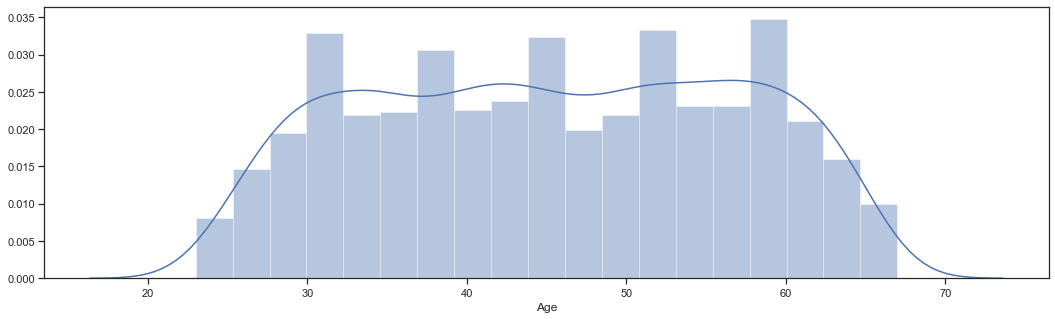

In [11]:
plt.figure(figsize=(18,5))
sns.set_color_codes()
sns.distplot(bank["Age"])

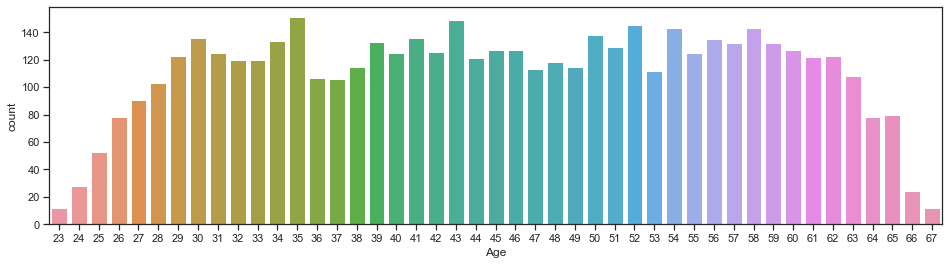

In [12]:
plt.figure(figsize=(16,4))
sns.set_color_codes()
sns.countplot(bank["Age"])

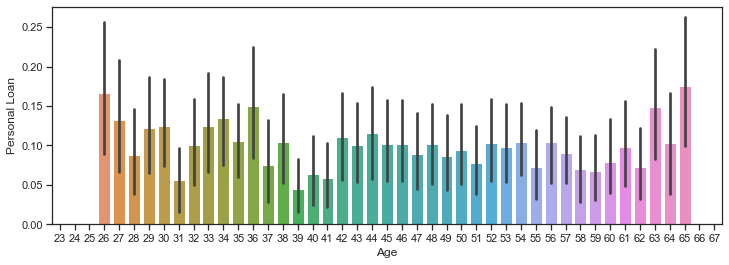

In [13]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.barplot(bank["Age"],bank["Personal Loan"])

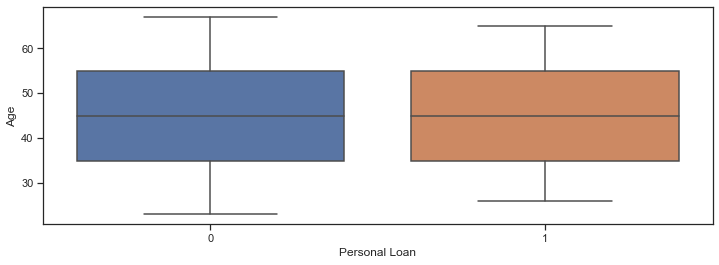

In [14]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.boxplot(y=bank["Age"],x=bank["Personal Loan"])

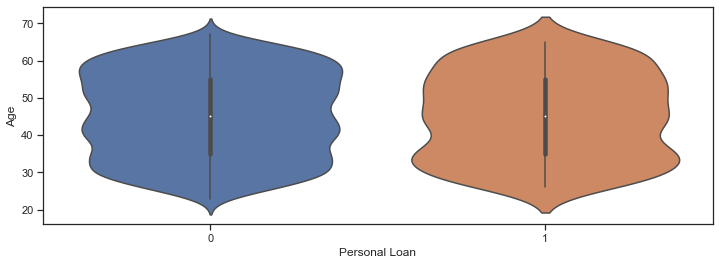

In [15]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.violinplot(y=bank["Age"],x=bank["Personal Loan"])

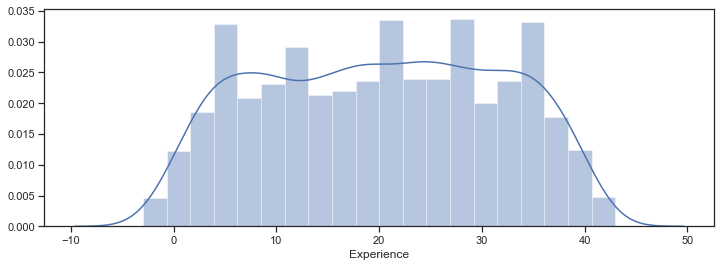

In [16]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.distplot(bank["Experience"])

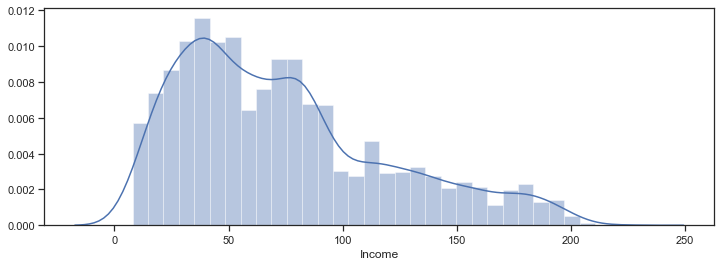

In [17]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.distplot(bank["Income"])

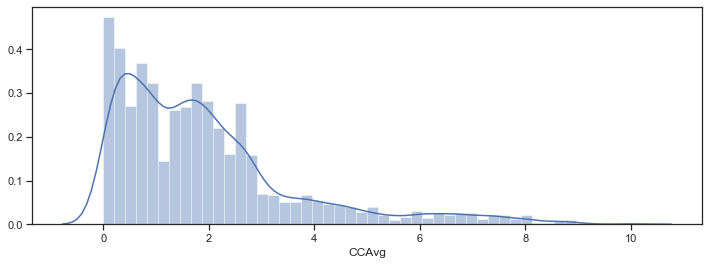

In [18]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.distplot(bank["CCAvg"])

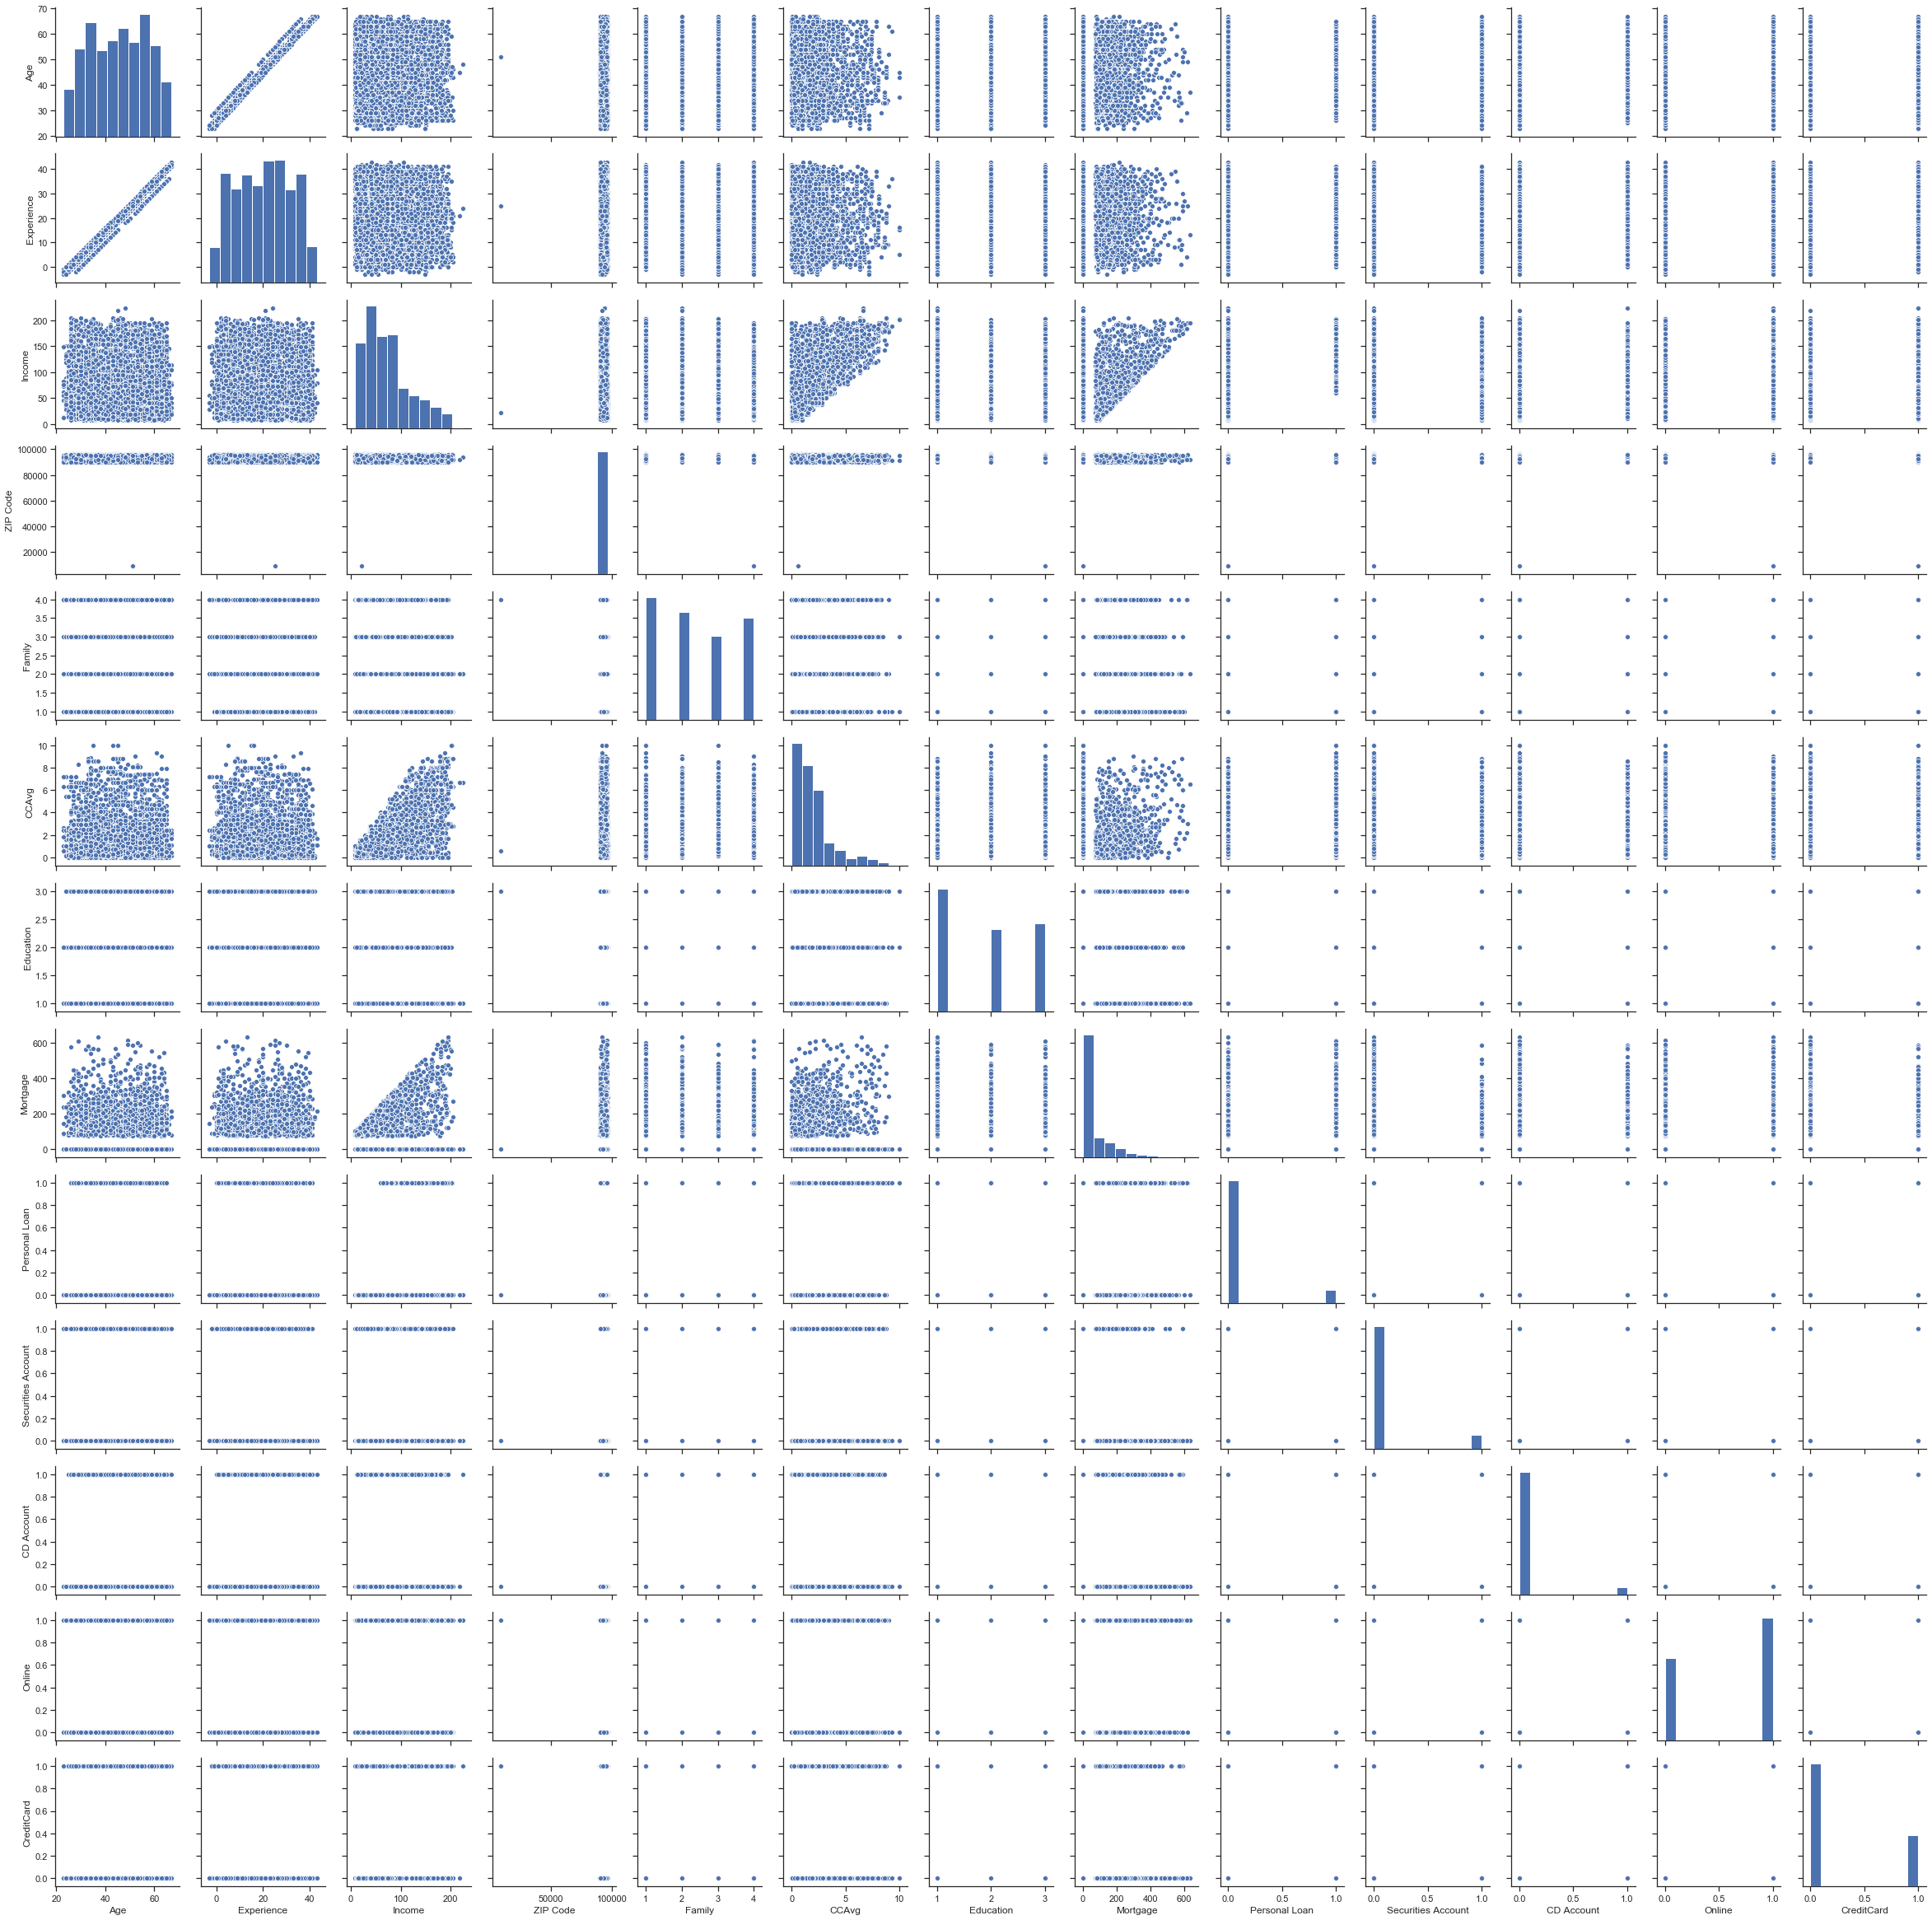

In [21]:
sns.pairplot(bank.iloc[:,1:])

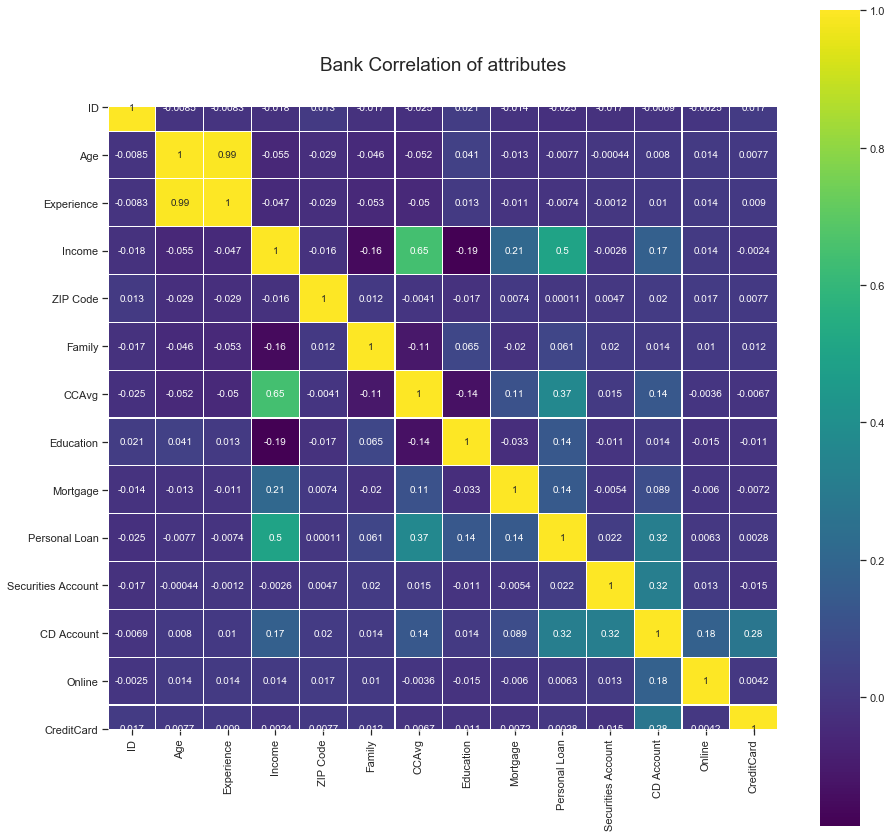

In [20]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Bank Correlation of attributes', y=1.05, size=19)
sns.heatmap(bank.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

# # # Age is normally distributed with majority of customers falling between 30 to 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

In [22]:
bank.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


In [23]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [24]:
bank[bank['Experience'] < 0]['Experience'].count()

52

there are 52 records with negative experience. Before proceeding any further we need to clean the same

In [25]:
#clean the negative variable
dfExp = bank.loc[bank['Experience'] >0]
negExp = bank.Experience < 0
column_name = 'Experience'
mylist = bank.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
mylist[:1]

[90]

In [26]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [28]:
for id in mylist:
    age = bank.loc[np.where(bank['ID']==id)]["Age"].tolist()[0]
    education = bank.loc[np.where(bank['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    bank.loc[bank.loc[np.where(bank['ID']==id)].index, 'Experience'] = exp
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
# checking if there are records with negative experience
bank[bank['Experience'] < 0]['Experience'].count()

0

In [30]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


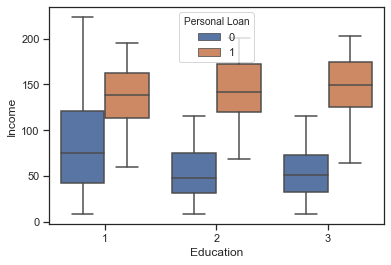

In [31]:
#Influence of income and education on personal loan¶
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank)

# It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

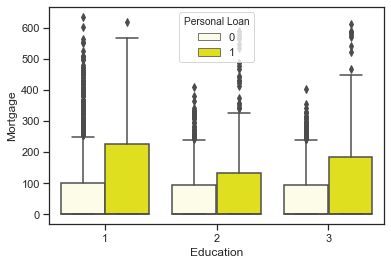

In [32]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank,color='yellow')

# From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

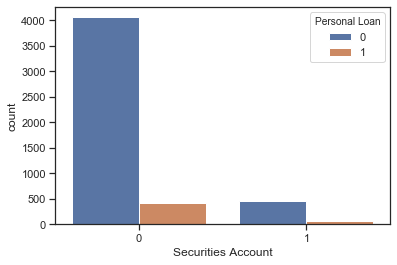

In [33]:
sns.countplot(x="Securities Account", data=bank,hue="Personal Loan")

Majority of customers who does not have loan have securities account

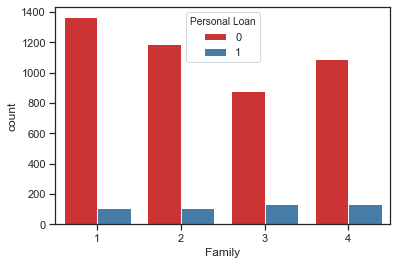

In [34]:
sns.countplot(x='Family',data=bank,hue='Personal Loan',palette='Set1')

# Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

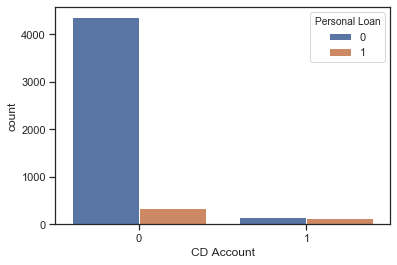

In [35]:
sns.countplot(x='CD Account',data=bank,hue='Personal Loan')

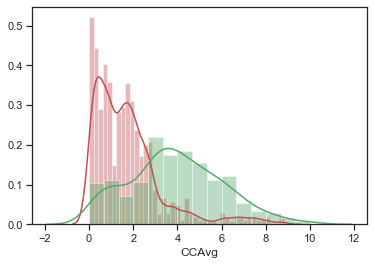

In [36]:
sns.distplot( bank[bank['Personal Loan']==0]['CCAvg'], color = 'r')
sns.distplot( bank[bank['Personal Loan']==1]['CCAvg'], color = 'g')

In [37]:
print('Credit card spending of Non-Loan customers: ',bank[bank['Personal Loan']==0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank[bank['Personal Loan']==1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0, 0.5, 'Age')

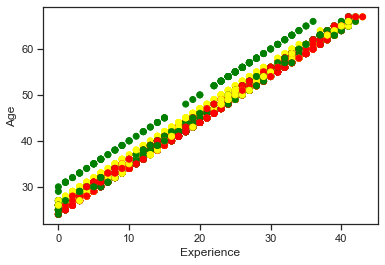

In [39]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bank['Experience'],bank['Age'],c=bank['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

# The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

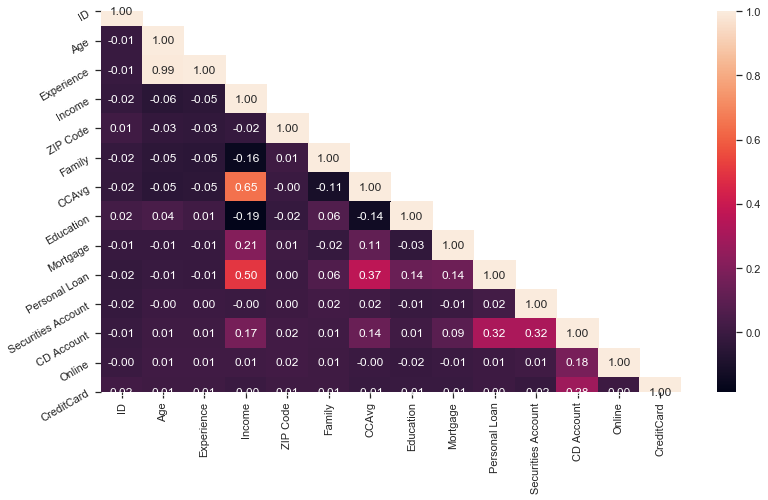

In [40]:
corr = bank.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

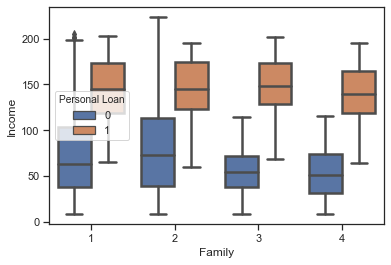

In [41]:
sns.boxplot(x=bank['Family'],y=bank['Income'],hue=bank['Personal Loan'])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

# Creating Train Data and Test Data

In [42]:
X=bank.drop(["ID","Experience","Personal Loan"],axis=1)
y=bank["Personal Loan"]

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=11,test_size=0.3)

In [44]:
X_train.shape

(3500, 11)

In [46]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Using different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans 

In [47]:
# Logistic Regression
model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0  0.005683  0.036355 -0.000069  0.01624  0.004446  0.016852  0.000676   

          7         8         9        10  intercept  
0  0.000651  0.004323 -0.000825  0.000167  -0.000085  


In [48]:
model_score= model.score(X_test, y_test)
print(model_score)

0.9086666666666666


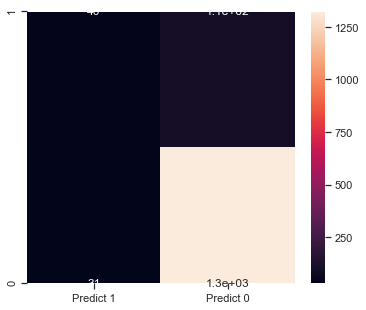

In [68]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm, annot=True)

confusion matrix
True Positives (TP): we correctly predicted that they do have loan 40

True Negatives (TN): we correctly predicted that they don't have loan 1330

False Positives (FP): we incorrectly predicted that they do have loan (a "Type I error") 31 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have loan (a "Type II error") 112 Falsely predict negative Type II error

# Building KNN model

In [53]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [54]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9013333333333333

Confusion Matrix


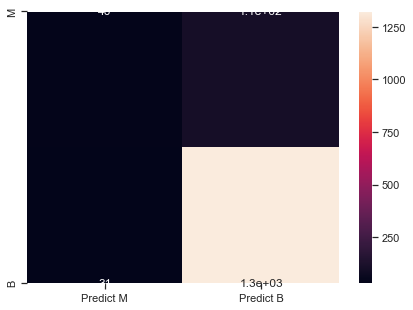

In [55]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                   columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

confusion matrix 


True Positives (TP): we correctly predicted that they do have loan 40


True Negatives (TN): we correctly predicted that they don't have loan 1330


False Positives (FP): we incorrectly predicted that they do have loan (a "Type I error") 31 Falsely predict positive Type I error 


False Negatives (FN): we incorrectly predicted that they don't have loan (a "Type II error") 112 Falsely predict negative Type II error

In [56]:
gnb_model=GaussianNB()

In [57]:
gnb_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
gnb_model_pred=gnb_model.predict(X_train)

In [59]:
gnb_model_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
print("Model accurace is GNB : {:.2f}".format(metrics.accuracy_score(y_train,gnb_model_pred)))
print()

Model accurace is GNB : 0.89



In [61]:
print(gnb_model_pred)
print("confusing matrics")
gnb_model_pred=gnb_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, gnb_model_pred, labels=[1, 0])
cm

[0 0 0 ... 1 0 0]
confusing matrics


array([[  83,   63],
       [ 103, 1251]], dtype=int64)

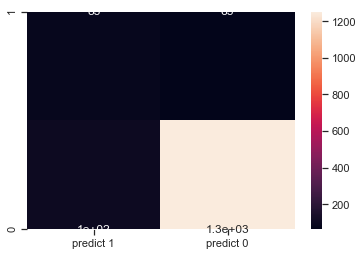

In [62]:
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])
#plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [63]:
cm

array([[  83,   63],
       [ 103, 1251]], dtype=int64)

In [64]:
print(metrics.classification_report(y_test, gnb_model_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.45      0.57      0.50       146
           0       0.95      0.92      0.94      1354

    accuracy                           0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.90      1500



In [65]:
X=bank.drop(['Personal Loan','Experience','ID'],axis=1)
y=bank.pop('Personal Loan')

KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LR: 0.908400 (0.008040)


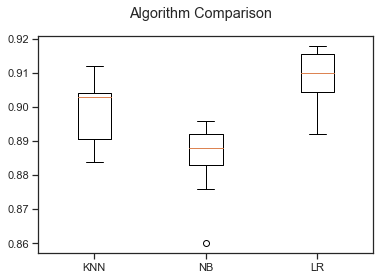

In [67]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#  From the above graph , it seems like Decision LogisticRegression or SVM have the highest accuracy and we can choose that as our final model